In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'E:\data set\Task-13\mnist.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separation of column  features and labels

In [19]:
X = data.drop('label', axis=1)
y = data['label']

X = X / 255.0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Evaluate the model

In [26]:
y_pred = clf.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7535


confusion matrix

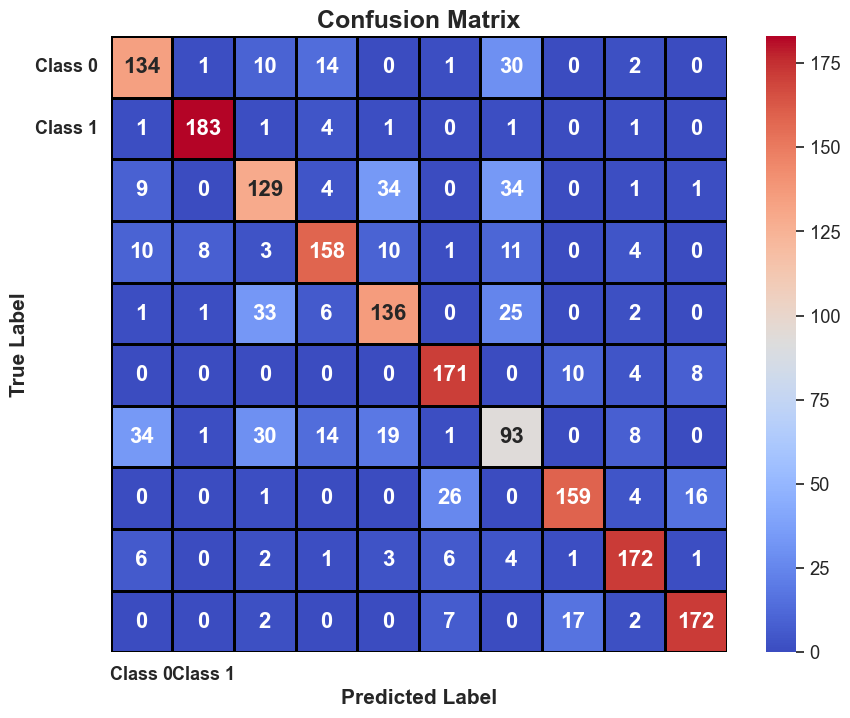

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=2, linecolor='black',
            annot_kws={"size": 16, "weight": 'bold'}, square=True)

plt.xlabel('Predicted Label', fontsize=15, fontweight='bold')
plt.ylabel('True Label', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

# Adding labels to the x and y axes for more context
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=13, fontweight='bold')
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=13, fontweight='bold', rotation=0)

plt.show()